# Exploring Test Results for Polar Decoding
This file can be used to show different test results saved in the yaml files for the Quantum Polar Decoding algorithm explained in our paper **"Quantum Channel Decoding"** as submitted to the [QEC-22 conference](https://qce.quantum.ieee.org/2022/).

Please refer to the readme file in the root of this repo for more information about setting up the environment, installing the required packages, and getting ready to run this notebook.

Copyright &copy; 2022 InterDigital AI Research Lab

In [1]:
import numpy as np
from polarexp3 import *

Edit the file name in the ``loadYaml`` call in the following cell to show the experiment information in the specified file. Refer to the ``ExpFiles`` directory for a list of available files.


File Version:         3
Decoding Algorithms:  No Coding   Quantum   SC   SCL
Number of Blocks:     1000000
Number of Shots:      1024
Sigma2 fixed to:      0.5
Eb/No Values(db):     -4   -2   0   2   4   6   8
Simulators:           aer_simulator_statevector
Polar (16,11,0) Times:
  Classical: 36995.72 Sec.
  Quantum: 24593.45 Sec.

FER for (16,11,0) Polar Code, aer_simulator_statevector, L=4
Eb/No(db)  No Coding  Quantum    SC         SCL        
-4         0.896123   0.825844   0.833601   0.823488   
-2         0.786536   0.635957   0.654280   0.633723   
0          0.593672   0.353487   0.381585   0.352366   
2          0.343060   0.104372   0.124861   0.104122   
4          0.129323   0.010345   0.014791   0.010326   
6          0.025781   0.000182   0.000310   0.000182   
8          0.002032   0.000000   0.000002   0.000000   


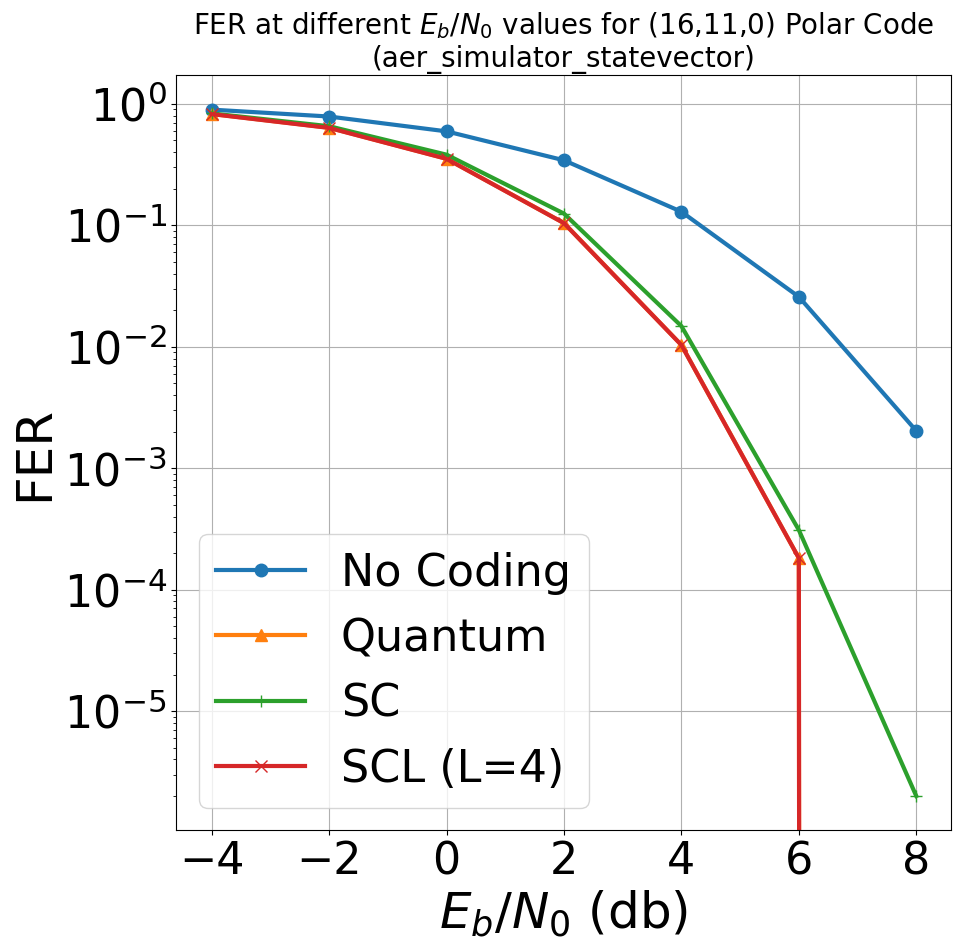

In [2]:
exp = loadYaml("ExpFiles/NewExpPolar16110.yml")

printResults(exp)
drawResults(exp)

The ``runExperiments`` function can be used to create new experiment files based on the specified configuration. You can play with the arguments to compare the performance of Quantum vs classical algorithms with different settings.

Polar Coding (4,3,0), SC ... Done (0.21 Sec.)
Polar Coding (4,3,0), SCL-(L=4) ... Done (0.53 Sec.)
Polar Coding (4,3,0), Quantum (aer_simulator) ... Done (5.56 Sec.)
Polar Coding (4,3,0), Quantum (aer_simulator_statevector) ... Done (5.51 Sec.)
Polar Coding (8,4,1), SC ... Done (0.42 Sec.)
Polar Coding (8,4,1), SCL-(L=4) ... Done (2.32 Sec.)
Polar Coding (8,4,1), Quantum (aer_simulator) ... Done (7.43 Sec.)
Polar Coding (8,4,1), Quantum (aer_simulator_statevector) ... Done (7.45 Sec.)
Total Time: 29.45 Sec.
Saving to 'ExpFiles/MyExp.yml'...Done.

File Version:         3
Decoding Algorithms:  Quantum   SC   SCL
Number of Blocks:     1000
Number of Shots:      1024
Sigma2 fixed to:      0.5
Eb/No Values(db):     -2   0   2   4
Simulators:           aer_simulator   aer_simulator_statevector
Polar (4,3,0) Times:
  Classical: 0.74 Sec.
  Quantum: 11.08 Sec.
Polar (8,4,1) Times:
  Classical: 2.75 Sec.
  Quantum: 14.88 Sec.

FER for (4,3,0) Polar Code, aer_simulator, L=4
Eb/No(db)  Quantum   

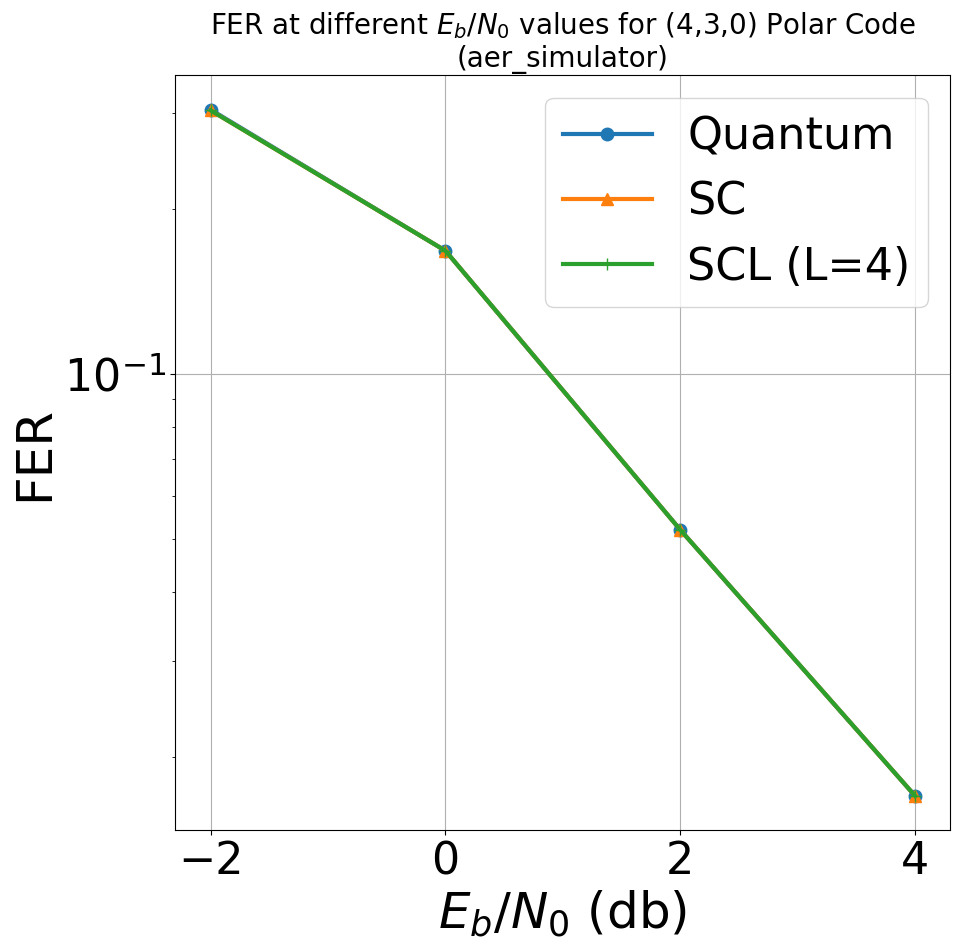

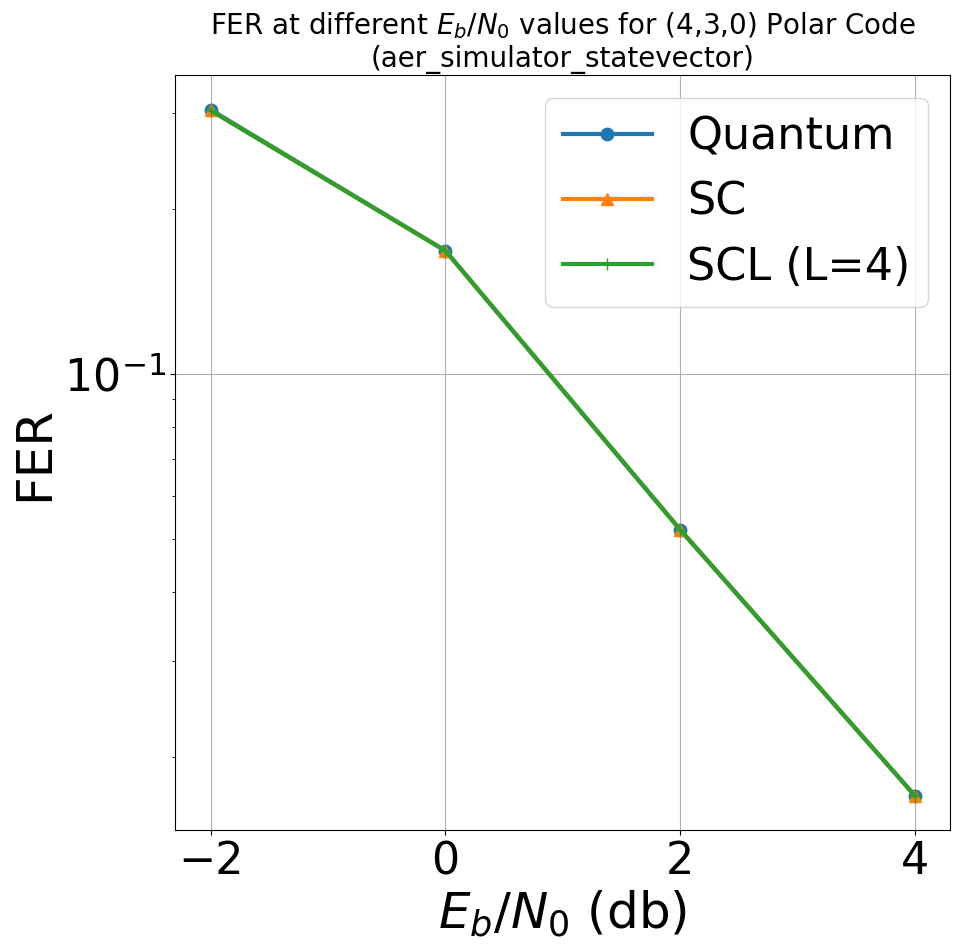

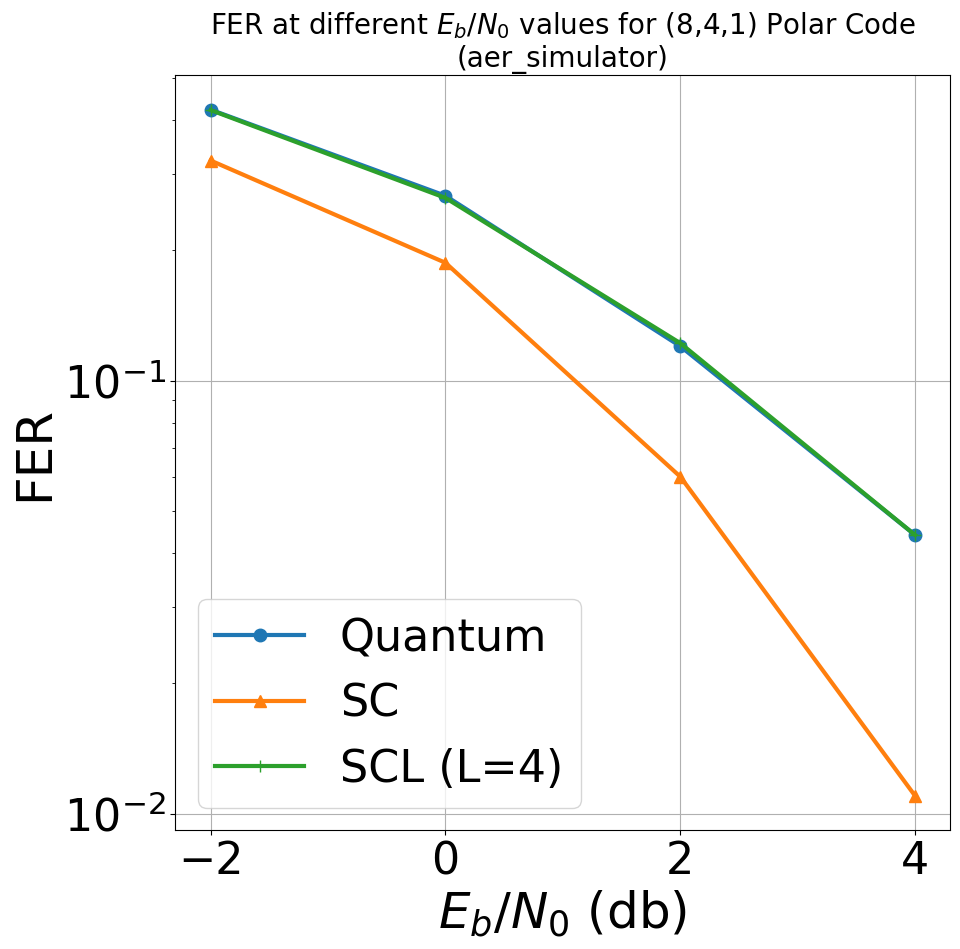

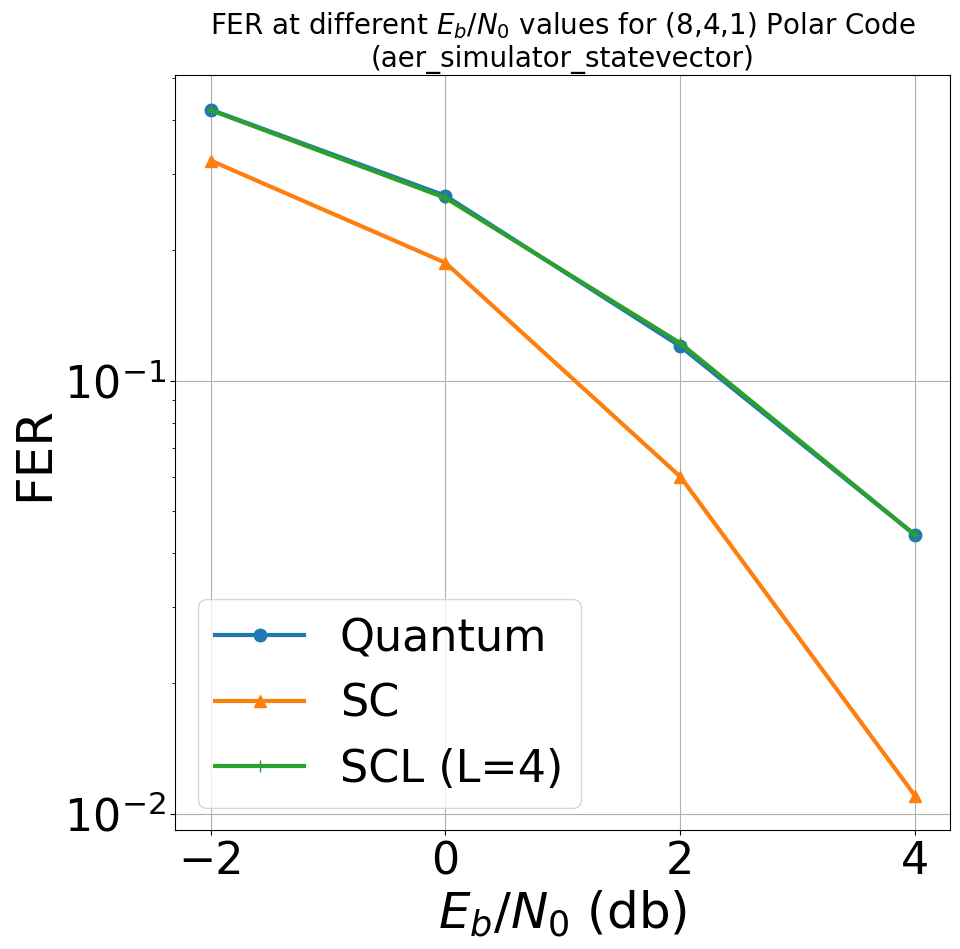

In [3]:
# Note: Depending on the configuration, this can take hours or days to complete.
exp = runExperiments("ExpFiles/MyExp.yml",
                     nBlocks = 1000,                   # Number of times to repeat to calculate the error rates
                     nShots = 1024,                    # Number of shots for used to run the quantum circuit
                     codes = [[4,3,0],[8,4,1]],        # A list of Polar codes (and CRC/Parity bits) to test
                     ebNoDbs = [-2, 0, 2, 4],          # A list of Eb/No values (in db)
                     decoders = ["Quantum", "SC", "SCL"],                         # A list of algorithms to test
                     simulators = ['aer_simulator', 'aer_simulator_statevector'], # Quantum simulators
                     sigma2 = 0.5)  # The fixed sigma value. (set to 'None' to use the actual noise power)

printResults(exp)
drawResults(exp)